In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv', 'sample_submission.csv', 'embeddings']


In [2]:
import string
import re
from os import listdir
from numpy import array
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from collections import Counter
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_colwidth', -1)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,roc_auc_score,roc_curve
import numpy as np
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from keras.preprocessing.sequence import pad_sequences

import os
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers


print("Libraries loaded")

Using TensorFlow backend.


Libraries loaded


**Read the data******

In [3]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")


In [4]:
# Train_1 = train[train['target']==1]
# Train_0 = train[train['target']==0]
# train =  pd.concat([Train_1,Train_0.head(len(Train_1))], axis=0)

In [5]:
train

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province as a nation in the 1960s?,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you encourage people to adopt and not shop?",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity affect space geometry?,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg hemispheres?,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain bike by just changing the tyres?,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?",0
6,00005059a06ee19e11ad,"Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?",0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off? Germs are everywhere.,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?",0
9,00006e6928c5df60eacb,"Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something go your way and feel temporarily at ease. How did things change?",0


In [6]:
# train = train.head(10)?
test_df = test

**Check the target column break down**

In [7]:
train["target"].value_counts()

0    1225312
1    80810  
Name: target, dtype: int64

The data is not balanced

**Word Cloud**

**1) Word cloud of Sincere questions**

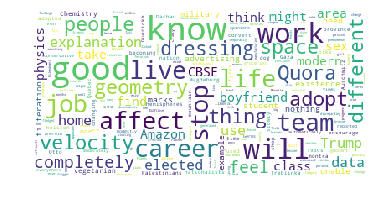

In [8]:
stopwords = set(STOPWORDS)


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(train[train.target==0]['question_text']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

**2) Word cloud of In-Sincere questions**

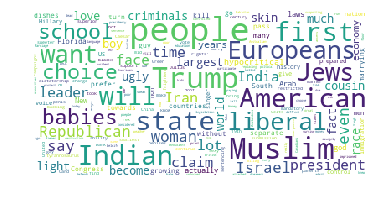

In [9]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(train[train.target==1]['question_text']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [10]:
## split to train and val
train_df, val_df = train_test_split(train, test_size=0.1, random_state=2018)

## some config values 
embed_size = 100 # how big is each word vector
max_features = 50000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a question to use

## fill up the missing values
train_X = train_df["question_text"].fillna("_na_").values
val_X = val_df["question_text"].fillna("_na_").values
test_X = test_df["question_text"].fillna("_na_").values

## Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_X))
train_X = tokenizer.texts_to_sequences(train_X)
val_X = tokenizer.texts_to_sequences(val_X)
test_X = tokenizer.texts_to_sequences(test_X)

## Pad the sentences 
train_X = pad_sequences(train_X, maxlen=maxlen)
val_X = pad_sequences(val_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)

## Get the target values
train_y = train_df['target'].values
val_y = val_df['target'].values


In [11]:

# inp = Input(shape=(maxlen,))
# x = Embedding(max_features, embed_size)(inp)
# x = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
# x = GlobalMaxPool1D()(x)
# x = Dense(16, activation="relu")(x)
# x = Dropout(0.1)(x)
# x = Dense(1, activation="sigmoid")(x)
# model = Model(inputs=inp, outputs=x)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print(model.summary())
# model.fit(train_X, train_y, batch_size=512, epochs=2, validation_data=(val_X, val_y))


# define the model
model = Sequential()
model.add(Embedding(max_features, embed_size, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
model.fit(train_X, train_y, batch_size=512, epochs=5, validation_data=(val_X, val_y))

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          5000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10001     
Total params: 5,010,001
Trainable params: 5,010,001
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 1175509 samples, validate on 130613 samples
Epoch 1/5
1175509/1175509 [==============================] - 18s 15us/step - loss: 0.1310 - acc: 0.9505 - val_loss: 0.1205 - val_acc: 0.9531
Epoch 2/5
1175509/1175509 [==============================] - 16s 13us/step - 

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,roc_auc_score,roc_curve, auc,  f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
# Making the Confusion Matrix
def get_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    # Model Precision: what percentage of positive tuples are labeled as such?
    print("Precision:",metrics.precision_score(y_test, y_pred))

    # Model Recall: what percentage of positive tuples are labelled as such?
    print(" True positive rate or (Recall or Sensitivity) :",metrics.recall_score(y_test, y_pred))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)

    #Specitivity. or True negative rate
    print(" True Negative rate or Specitivity :",specificity)

    false_negative = fn / (fn+tp)

    #False negative rate
    print(" False Negative rate :",false_negative)

    #False positive rate
    print(" False positive rate (Type 1 error) :",1 - specificity)
    
    print('F Score', f1_score(y_test, y_pred))
    print(cm)


130613/130613 [==============================] - 0s 2us/step
Accuracy: 0.9485885784722807
Precision: 0.6105015673981191
 True positive rate or (Recall or Sensitivity) : 0.4793846153846154
 True Negative rate or Specitivity : 0.9797122983475932
 False Negative rate : 0.5206153846153846
 False positive rate (Type 1 error) : 0.020287701652406787
F Score 0.5370561875215443
[[120003   2485]
 [  4230   3895]]


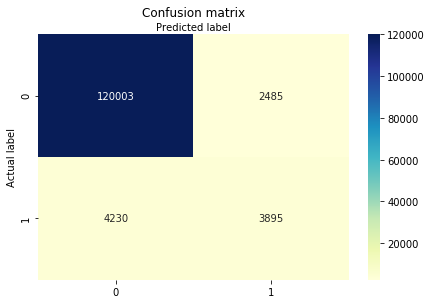

In [13]:
val_pred_y = model.predict_classes([val_X], batch_size=1024, verbose=1)
get_metrics(val_y,val_pred_y)

In [14]:
test_y = model.predict_classes([test_X], batch_size=1024, verbose=1)
output = pd.DataFrame({"qid":test_df["qid"].values})
output['prediction'] = test_y
output.to_csv("submission.csv", index=False)

375806/375806 [==============================] - 1s 2us/step
